## PROJECT DESCRIPTION.

## Module Imports

In [ ]:
import pandas as pd                
import matplotlib.pyplot as plt   
import seaborn as sns            
import pickle                      
from sklearn.svm import SVC                      

import warnings                                   
warnings.filterwarnings("ignore")               

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report   
from sklearn.metrics import mean_squared_error, r2_score



## DataLoader Description:

1. **`DataLoader`** – for loading a dataset from a CSV file.

2.**`DataHandler`** class – responsible for dynamically exploring the data after loading 

In [12]:


class Loader:
    """
    Loader class to load CSV data from a given filepath.

    Methods:
    --------
    load_data(filepath):
        Loads CSV data into a pandas DataFrame.

    Example:
    --------
    loader = Loader()
    df = loader.load_data("data.csv")
    """
    def load_data(self, filepath):
        """
        Load data from the given CSV file path.

        Parameters:
        filepath (str): Path to the CSV file.

        Returns:
        pd.DataFrame or None: Returns DataFrame if successful, else None.
        """
        try:
            data = pd.read_csv(filepath)
            print(" Data loaded successfully.")
            return data
        except FileNotFoundError:
            print(f" File not found: {filepath}")
            return None


class DataHandler:
    """
    A class for exploring a pandas DataFrame dynamically.

    Methods:
    --------
    explore_data(data, show_head, show_tail, show_columns, show_info, show_description)

    Example:
    --------
    handler = DataHandler()
    summary = handler.explore_data(data, show_head=True, show_info=True)
    """

    def explore_data(self, data, show_head=True, show_tail=True, show_columns=True,
                     show_info=True, show_description=True):
        """
        Explore various aspects of a pandas DataFrame based on flags.

        Parameters:
        data (pd.DataFrame): The loaded dataset.
        show_head (bool): If True, includes the first 5 rows.
        show_tail (bool): If True, includes the last 5 rows.
        show_columns (bool): If True, includes column names.
        show_info (bool): If True, prints info() summary.
        show_description (bool): If True, includes descriptive stats.

        Returns:
        dict: Dictionary containing selected summaries.
        """
        summary = {}

        
        if show_head:
            summary['head'] = data.head()

        
        if show_tail:
            summary['tail'] = data.tail()

        
        if show_columns:
            summary['columns'] = data.columns.tolist()

        
        if show_info:
            print("\n Data Info:")
            data.info()
            print()

        if show_description:
            summary['description'] = data.describe()

        return summary
    




## DATA PREPROCESSING DESCRIPTION:

- Make datapreprocessor class and summarize dataset.
- find Mean , Median , Mode , Handle Null Vlaues , Column info , Fillna , Dropna and find Null Values in dataset.
- Than loaded the data which is loaded in first class already.
- Than clean the data in missing values.
- Than filled the data in missing values.

In [ ]:
class DataPreprocessor:
    """
    Class to perform basic data preprocessing tasks on a dataset.
    Includes methods for mean, mode, median, null detection, dropna, and fillna.
    """

    def __init__(self, data):
        """
        Initialize with a pandas DataFrame.

        Parameters:
        data (pd.DataFrame): Dataset to preprocess
        """
        self.data = data.copy()  # Use a copy to avoid modifying original data

    def get_columns(self):
        """
        Return all column names in the dataset.

        Returns:
        list: Column names
        """
        return self.data.columns.tolist()

    def get_mean(self):
        """
        Return mean of all numeric columns.

        Returns:
        pd.Series: Mean values
        """
        return self.data.mean(numeric_only=True)

    def get_mode(self):
        """
        Return mode of each column (first mode if multiple).

        Returns:
        pd.Series: Mode values
        """
        return self.data.mode().iloc[0]

    def get_median(self):
        """
        Return median of all numeric columns.

        Returns:
        pd.Series: Median values
        """
        return self.data.median(numeric_only=True)

    def find_nulls(self):
        """
        Find number of null values in each column.

        Returns:
        pd.Series: Null counts
        """
        return self.data.isnull().sum()

    def drop_nulls(self):
        """
        Drop rows with any null values.

        Returns:
        pd.DataFrame: Cleaned dataset
        """
        return self.data.dropna()

    def fill_nulls_with_mean(self):
        """
        Fill nulls with mean of each numeric column.

        Returns:
        pd.DataFrame: Dataset with filled nulls
        """
        return self.data.fillna(self.data.mean(numeric_only=True))


## DATA VISUALIZER DESCRIPTION:

### In data visualizer we make differents types of garphs along each columns accoriding to dataset.
1.Histogram → for numeric distribution

2.Pie Chart → for categorical column proportions

3.Scatter Plot → for pairs of numeric columns

4.Bar Chart → for categorical column value counts



In [14]:


class DataVisualizer:
    """
    A flexible data visualization class to create various charts with customizable parameters.
    """

    def __init__(self, data):
        """
        Initialize the visualizer with a copy of the dataset.
        
        Parameters:
        data (pd.DataFrame): Dataset to visualize.
        """
        self.data = data.copy()

    def plot_histogram(self, column, title, xlabel="", ylabel="Frequency", color='skyblue', bins=30, width=8, height=6):
        """
        Plot a histogram for a numeric column.

        Parameters:
        column (str): Column to visualize.
        title (str): Title of the plot.
        xlabel (str): Label for X-axis.
        ylabel (str): Label for Y-axis.
        color (str): Color of the bars.
        bins (int): Number of bins in histogram.
        width (int): Width of the figure.
        height (int): Height of the figure.
        """
        if column in self.data.select_dtypes(include='number').columns:
            plt.figure(figsize=(width, height))
            sns.histplot(self.data[column], kde=True, bins=bins, color=color)
            plt.title(title or f"Histogram of {column}")
            plt.xlabel(xlabel or column)
            plt.ylabel(ylabel)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Error: '{column}' is not a numeric column.")

    def plot_pie_chart(self, column, title="", width=6, height=6):
        """
        Plot a pie chart for a categorical column.

        Parameters:
        column (str): Column to visualize.
        title (str): Title of the chart.
        width (int): Width of the figure.
        height (int): Height of the figure.
        """
        if column in self.data.select_dtypes(include='object').columns:
            plt.figure(figsize=(width, height))
            self.data[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
            plt.title(title or f"Pie Chart of {column}")
            plt.ylabel("")
            plt.tight_layout()
            plt.show()
        else:
            print(f"Error: '{column}' is not a categorical column.")

    def plot_scatter(self, x_col, y_col, title, xlabel="", ylabel="", color='skyblue', width=8, height=6):
        """
        Plot a scatter plot between two numeric columns.

        Parameters:
        x_col (str): X-axis column.
        y_col (str): Y-axis column.
        title (str): Title of the chart.
        xlabel (str): Label for X-axis.
        ylabel (str): Label for Y-axis.
        color (str): Color of the points.
        width (int): Width of the figure.
        height (int): Height of the figure.
        """
        if x_col in self.data.select_dtypes(include='number').columns and y_col in self.data.select_dtypes(include='number').columns:
            plt.figure(figsize=(width, height))
            sns.scatterplot(data=self.data, x=x_col, y=y_col, color=color)
            plt.title(title or f"Scatter Plot: {x_col} vs {y_col}")
            plt.xlabel(xlabel or x_col)
            plt.ylabel(ylabel or y_col)
            plt.tight_layout()
            plt.show()
        else:
            print("Error: Both columns must be numeric.")

    def plot_bar_chart(self, column, title, xlabel="", ylabel="Count", color='skyblue', width=8, height=6):
        """
        Plot a bar chart for a categorical column.

        Parameters:
        column (str): Column to visualize.
        title (str): Title of the chart.
        xlabel (str): Label for X-axis.
        ylabel (str): Label for Y-axis.
        color (str): Color of bars.
        width (int): Width of the figure.
        height (int): Height of the figure.
        """
        if column in self.data.select_dtypes(include='object').columns:
            plt.figure(figsize=(width, height))
            sns.countplot(x=column, data=self.data, color=color)
            plt.title(title or f"Bar Chart of {column}")
            plt.xlabel(xlabel or column)
            plt.ylabel(ylabel)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Error: '{column}' is not a categorical column.")

    def plot_line_chart(self, column, title, xlabel="Index", ylabel="", color='skyblue', width=8, height=6):
        """
        Plot a line chart for a numeric column over index.

        Parameters:
        column (str): Column to visualize.
        title (str): Title of the chart.
        xlabel (str): Label for X-axis.
        ylabel (str): Label for Y-axis.
        color (str): Line color.
        width (int): Width of the figure.
        height (int): Height of the figure.
        """
        if column in self.data.select_dtypes(include='number').columns:
            plt.figure(figsize=(width, height))
            plt.plot(self.data.index, self.data[column], color=color, marker='o')
            plt.title(title or f"Line Chart of {column}")
            plt.xlabel(xlabel)
            plt.ylabel(ylabel or column)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Error: '{column}' is not a numeric column.")

## BIVARATE DESCRIPTION:

### Included Graphs (All Bivariate):
All these come from or extend concepts from the DataVisualizer class:

Scatter Plot – between pairs of numeric variables

Line Plot – one numeric vs. another (e.g., time-series)

Bar Plot – categorical vs. numeric (e.g., category vs. average value)

Box Plot – categorical vs. numeric (shows spread)

Heatmap – correlation between numeric variables

In [15]:

class BivariateVisualizer:
    """
    Class for generating bivariate visualizations between two variables at a time:
    - Scatter Plot
    - Line Plot
    - Bar Plot
    - Box Plot
    - Correlation Heatmap
    """

    def __init__(self, data):
        """
        Initialize the visualizer with dataset.
        
        Parameters:
        data (pd.DataFrame): The input dataset.
        """
        self.data = data.copy()

    def plot_scatter(self, x_col, y_col, title, xlabel='', ylabel='', color='green', width=8, height=6):
        """
        Plot a single scatter plot between two numeric variables.
        """
        plt.figure(figsize=(width, height))
        sns.scatterplot(x=self.data[x_col], y=self.data[y_col], color=color)
        plt.title(title or f"Scatter Plot: {x_col} vs {y_col}")
        plt.xlabel(xlabel or x_col)
        plt.ylabel(ylabel or y_col)
        plt.tight_layout()
        plt.show()

    def plot_line(self, x_col, y_col, title, xlabel='', ylabel='', color='blue', width=8, height=6):
        """
        Plot a single line plot between two variables.
        """
        plt.figure(figsize=(width, height))
        plt.plot(self.data[x_col], self.data[y_col], color=color, marker='o')
        plt.title(title or f"Line Plot: {x_col} vs {y_col}")
        plt.xlabel(xlabel or x_col)
        plt.ylabel(ylabel or y_col)
        plt.tight_layout()
        plt.show()

    def plot_bar(self, x_col, y_col, title, xlabel='', ylabel='', color='orange', width=8, height=6):
        """
        Plot a single bar chart showing a numeric value across categories.
        """
        plt.figure(figsize=(width, height))
        sns.barplot(x=x_col, y=y_col, data=self.data, color=color)
        plt.title(title or f"Bar Plot: {y_col} by {x_col}")
        plt.xlabel(xlabel or x_col)
        plt.ylabel(ylabel or y_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_box(self, x_col, y_col, title, xlabel='', ylabel='', palette='Set2', width=8, height=6):
        """
        Plot a single box plot showing distribution of a numeric column grouped by a category.
        """
        plt.figure(figsize=(width, height))
        sns.boxplot(x=x_col, y=y_col, data=self.data, palette=palette)
        plt.title(title or f"Box Plot: {y_col} by {x_col}")
        plt.xlabel(xlabel or x_col)
        plt.ylabel(ylabel or y_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_heatmap(self, title="Correlation Heatmap", cmap='coolwarm', width=10, height=8):
        """
        Plot a heatmap showing correlation between all numeric variables.
        """
        numeric_data = self.data.select_dtypes(include='number')
        corr = numeric_data.corr()

        plt.figure(figsize=(width, height))
        sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f")
        plt.title(title)
        plt.tight_layout()
        plt.show()

### Univarate Description:

### Graphs Covered:
Histogram → numeric column distribution

Pie Chart → proportion of categories

Bar Chart → frequency of categorical values

Line Plot → trend of each numeric column across the datase

In [16]:


class UnivariateVisualizer:
    """
    Class for univariate visualizations.
    Supports:
    - Histogram (numeric)
    - Pie Chart (categorical)
    - Bar Chart (categorical)
    - Line Chart (numeric)
    """

    def __init__(self, data):
        """
        Initialize with a copy of the dataset.
        
        Parameters:
        data (pd.DataFrame): Input dataset.
        """
        self.data = data.copy()

    def plot_histogram(self, column, title="", xlabel="", ylabel="Frequency", bins=30, kde=True, color='skyblue', width=8, height=6):
        """
        Plot histogram for a single numeric column.
        """
        plt.figure(figsize=(width, height))
        sns.histplot(self.data[column], bins=bins, kde=kde, color=color)
        plt.title(title or f"Histogram of {column}")
        plt.xlabel(xlabel or column)
        plt.ylabel(ylabel)
        plt.tight_layout()
        plt.show()

    def plot_pie_chart(self, column, title="", colors=None, width=6, height=6):
        """
        Plot pie chart for a single categorical column.
        """
        plt.figure(figsize=(width, height))
        self.data[column].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
        plt.title(title or f"Pie Chart of {column}")
        plt.ylabel('')
        plt.tight_layout()
        plt.show()

    def plot_bar_chart(self, column, title="", xlabel="", ylabel="Count", color='lightgreen', width=8, height=6):
        """
        Plot bar chart (countplot) for a single categorical column.
        """
        plt.figure(figsize=(width, height))
        sns.countplot(x=column, data=self.data, color=color)
        plt.title(title or f"Bar Chart of {column}")
        plt.xlabel(xlabel or column)
        plt.ylabel(ylabel)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_line_chart(self, column, title="", xlabel="Index", ylabel="", color='purple', width=8, height=6):
        """
        Plot line chart for a single numeric column.
        """
        plt.figure(figsize=(width, height))
        plt.plot(self.data.index, self.data[column], color=color, marker='o')
        plt.title(title or f"Line Chart of {column}")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel or column)
        plt.tight_layout()
        plt.show()



## MODEL TRAIN DESCRIPTION:

### In the model bulider class included:
Data Splitting – train/test

Data Scaling – standardizing values

Model Training – using Support Vector Machine (SVC)

Prediction – testing the model

Confusion Matrix – to evaluate prediction vs actual

Classification Report – precision, recall, F1-score



In [ ]:


class Model:
    def __init__(self, df, target_column):
        self.df = df
        self.target_column = target_column
        self.model = None
        self.scaler = None
        self.X_train = self.X_test = self.y_train = self.y_test = None
        self.X_train_scaled = self.X_test_scaled = None

    def split_data(self, test_size=0.2, random_state=42):
        X = self.df.drop(columns=[self.target_column])
        y = self.df[self.target_column]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    def scale_data(self, method='standard'):
        if method == 'standard':
            self.scaler = StandardScaler()
        elif method == 'minmax':
            self.scaler = MinMaxScaler()
        else:
            raise ValueError("Unsupported scaling method.")
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

    def train_model(self):
        model = SVR(kernel='linear')  # Use SVR for regression
        if self.X_train_scaled is not None:
            self.model = model.fit(self.X_train_scaled, self.y_train)
        else:
            self.model = model.fit(self.X_train, self.y_train)

    def evaluate(self):
        if self.X_test_scaled is not None:
            preds = self.model.predict(self.X_test_scaled)
        else:
            preds = self.model.predict(self.X_test)

        print("🔍 Evaluation:")
        print("MSE:", mean_squared_error(self.y_test, preds))
        print("R² Score:", r2_score(self.y_test, preds))



In [18]:
loader = Loader()
data = loader.load_data("Student_Marks.csv")

if data is not None:
    handler = DataHandler()
    summary = handler.explore_data(
        data,
        show_head=True,
        show_tail=False,
        show_columns=True,
        show_info=True,
        show_description=True
    )

 Data loaded successfully.

 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB



In [19]:
print("First 5 Rows:", summary["head"])

First 5 Rows:    number_courses  time_study   Marks
0               3       4.508  19.202
1               4       0.096   7.734
2               4       3.133  13.811
3               6       7.909  53.018
4               8       7.811  55.299


In [20]:
print("Columns:", summary["columns"])

Columns: ['number_courses', 'time_study', 'Marks']


In [21]:
print("Description:", summary["description"])

Description:        number_courses  time_study       Marks
count      100.000000  100.000000  100.000000
mean         5.290000    4.077140   24.417690
std          1.799523    2.372914   14.326199
min          3.000000    0.096000    5.609000
25%          4.000000    2.058500   12.633000
50%          5.000000    4.022000   20.059500
75%          7.000000    6.179250   36.676250
max          8.000000    7.957000   55.299000


In [22]:
preprocessor = DataPreprocessor(data)

print("Column Names:", preprocessor.get_columns())


Column Names: ['number_courses', 'time_study', 'Marks']


In [23]:
print("Mean Values:", preprocessor.get_mean())

Mean Values: number_courses     5.29000
time_study         4.07714
Marks             24.41769
dtype: float64


In [24]:
print("Mode Values:", preprocessor.get_mode())

Mode Values: number_courses    3.000
time_study        0.096
Marks             5.609
Name: 0, dtype: float64


In [25]:
print("Median Values:", preprocessor.get_median())

Median Values: number_courses     5.0000
time_study         4.0220
Marks             20.0595
dtype: float64


In [26]:
print("Null Values:", preprocessor.find_nulls())

Null Values: number_courses    0
time_study        0
Marks             0
dtype: int64


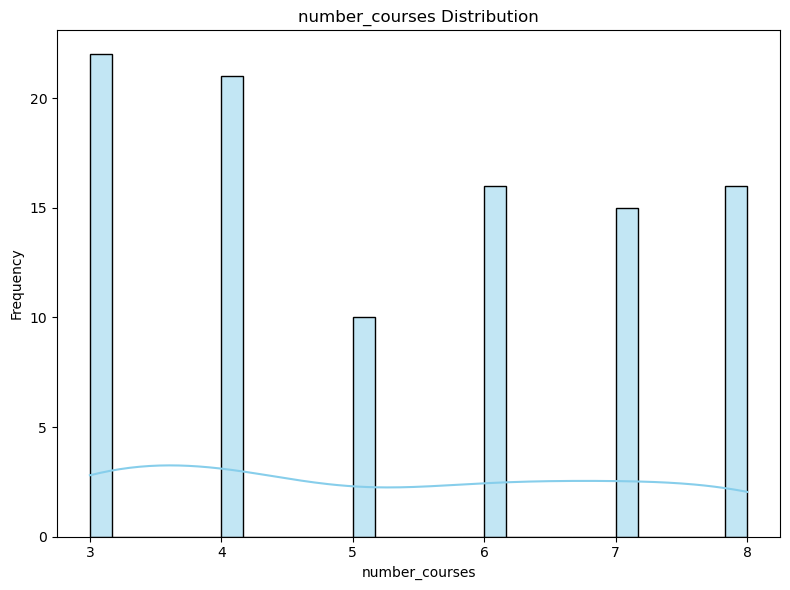

In [27]:
df = pd.read_csv("Student_Marks.csv")
visualizer = DataVisualizer(df)

visualizer.plot_histogram(column='number_courses', title='number_courses Distribution')

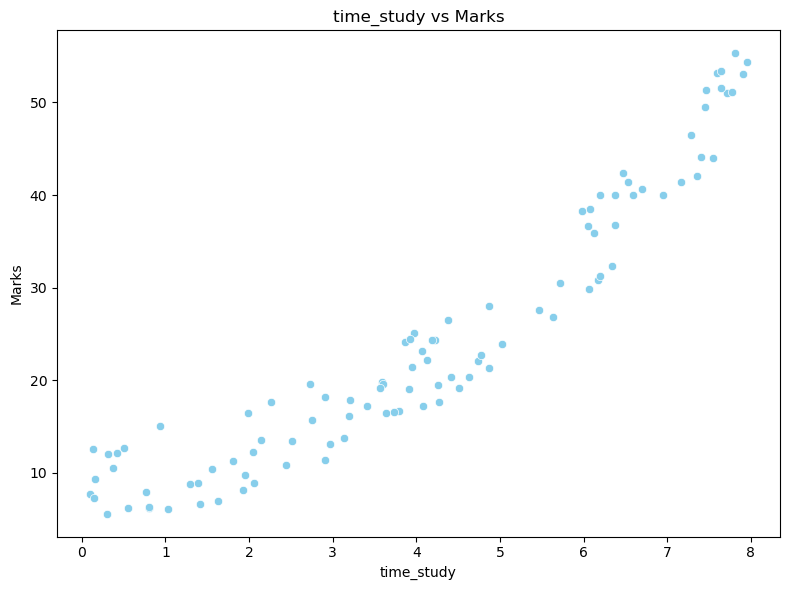

In [28]:

visualizer.plot_scatter(x_col='time_study', y_col='Marks', title='time_study vs Marks')

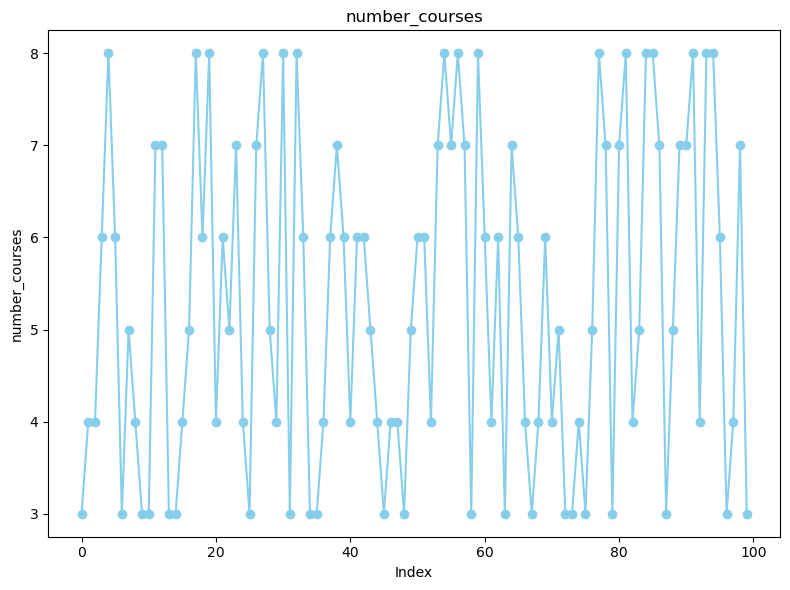

In [29]:
visualizer.plot_line_chart(column='number_courses', title='number_courses')

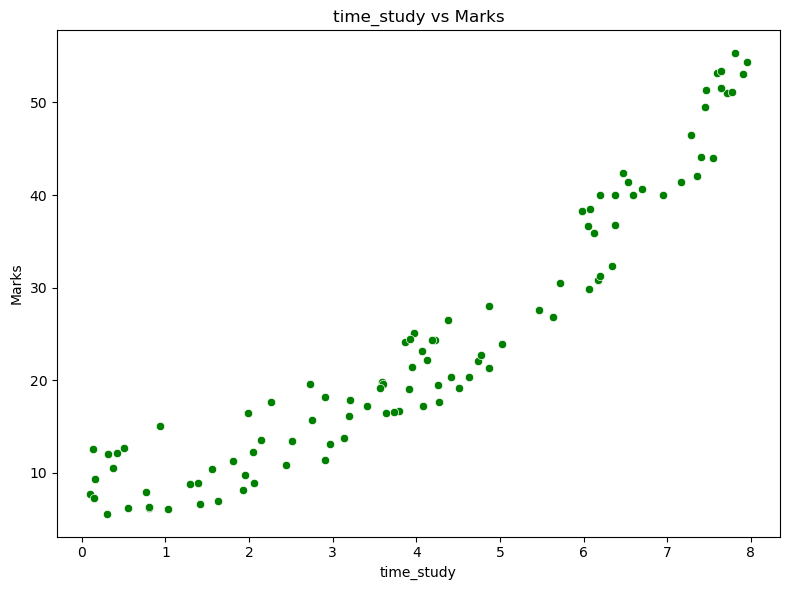

In [30]:

visualizer = BivariateVisualizer(df)


visualizer.plot_scatter(x_col="time_study", y_col="Marks", title="time_study vs Marks")



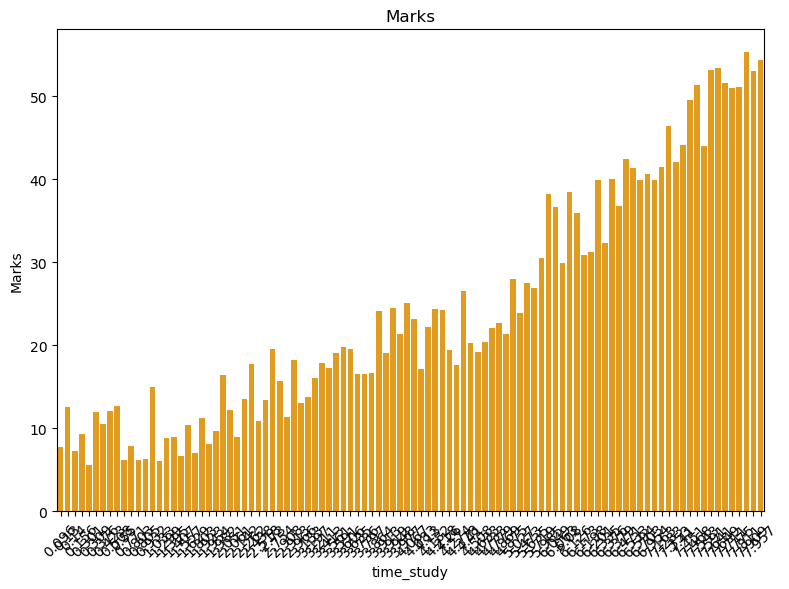

In [31]:
visualizer.plot_bar(x_col="time_study", y_col="Marks", title="Marks")

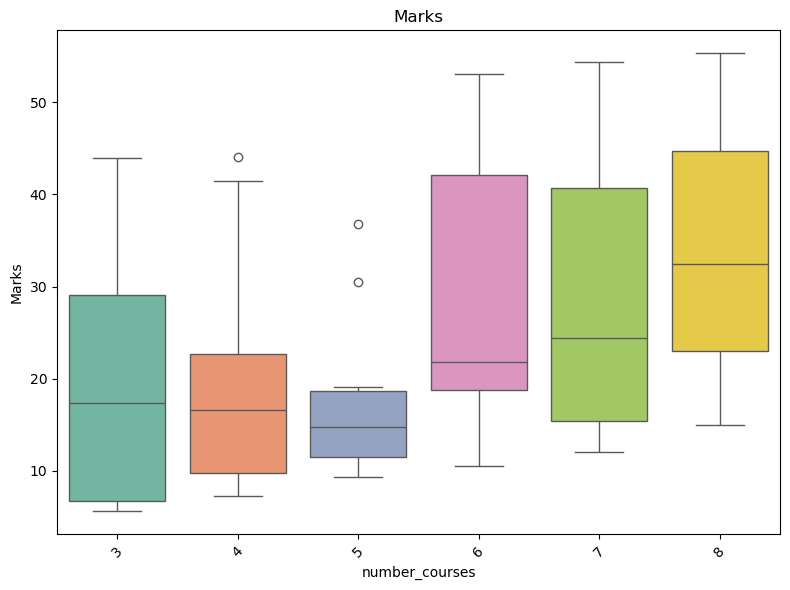

In [32]:
visualizer.plot_box(x_col="number_courses", y_col="Marks",title="Marks")

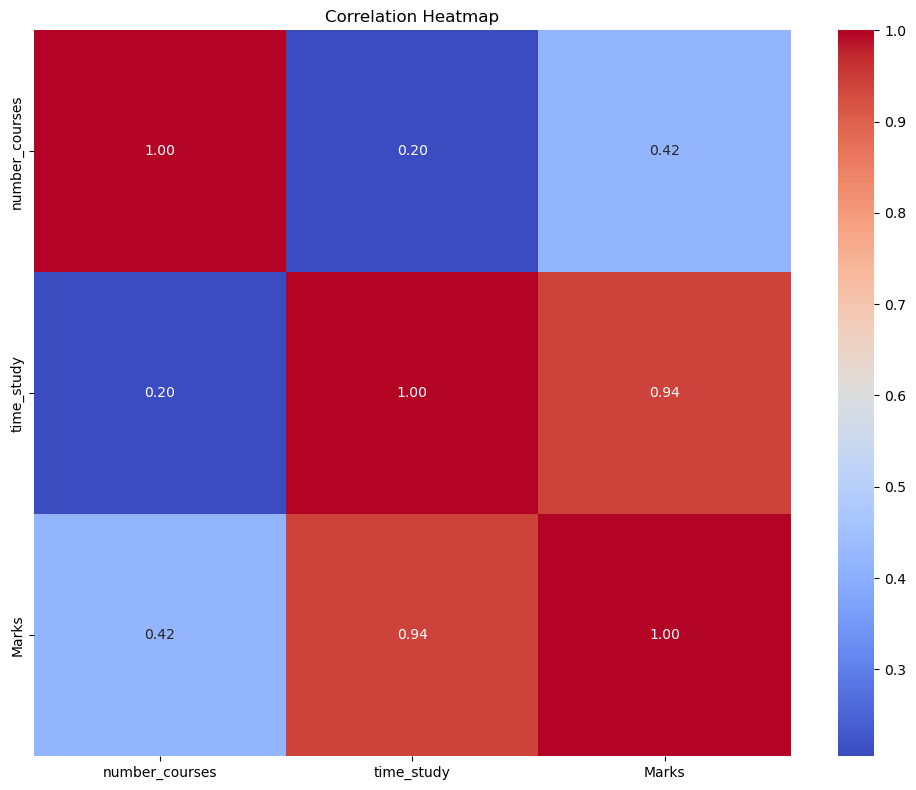

In [33]:
visualizer.plot_heatmap()

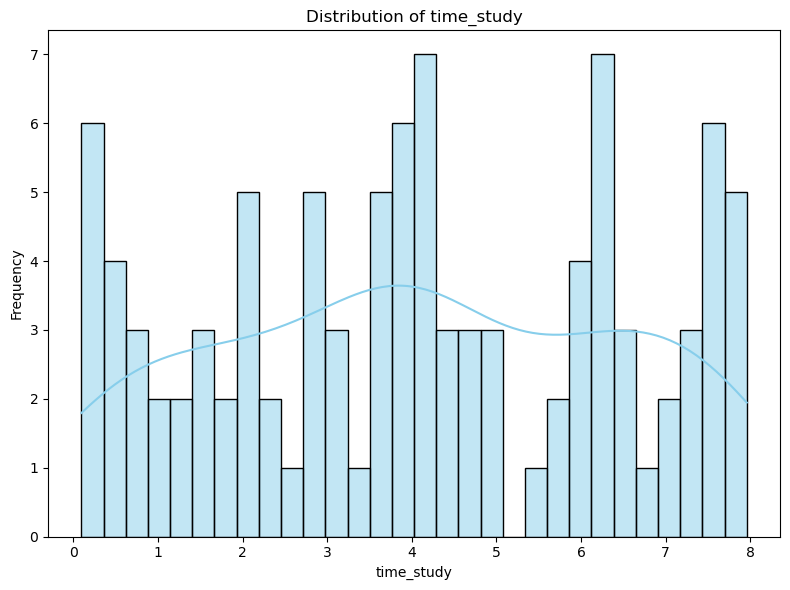

In [34]:
uni_viz = UnivariateVisualizer(df)

uni_viz.plot_histogram(column="time_study", title="Distribution of time_study")

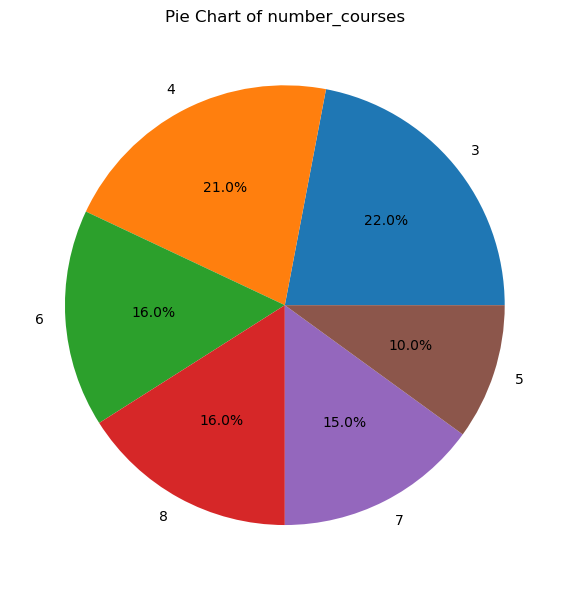

In [35]:
uni_viz.plot_pie_chart(column="number_courses")

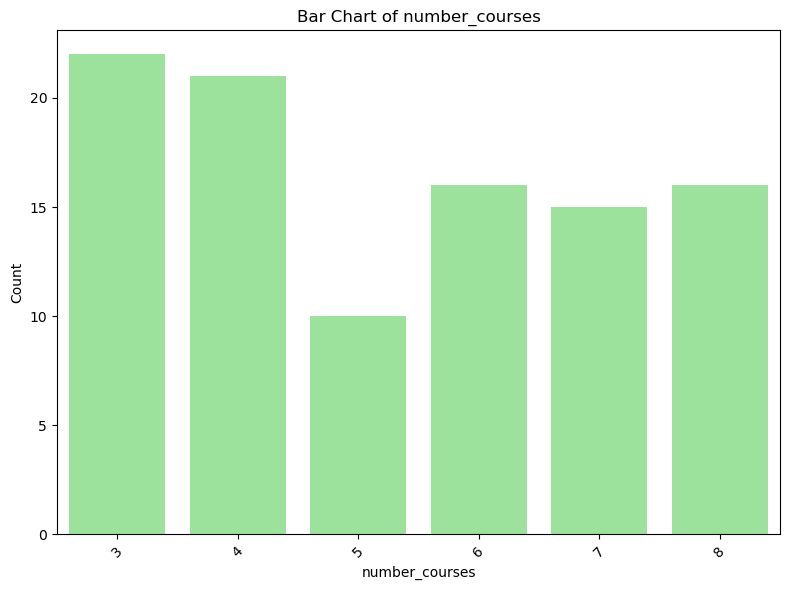

In [36]:
uni_viz.plot_bar_chart(column="number_courses")

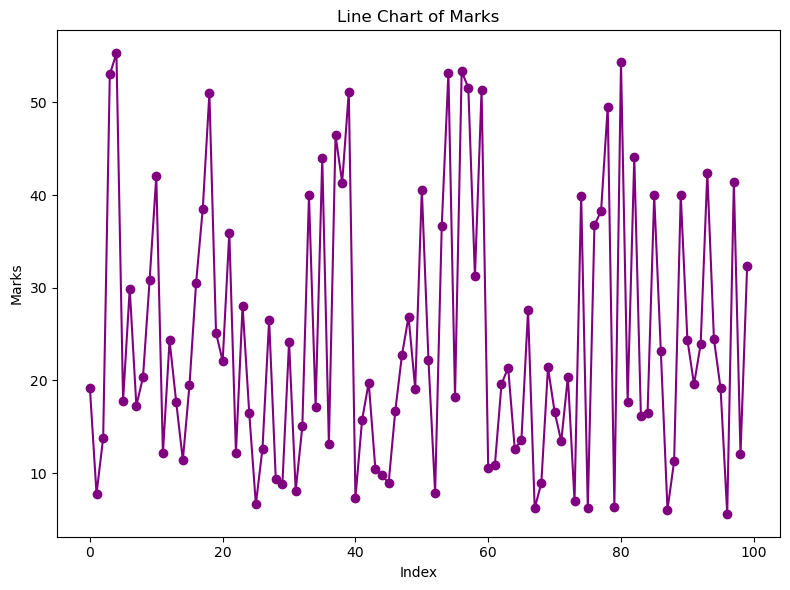

In [37]:
uni_viz.plot_line_chart(column="Marks")

In [38]:
df = df[['number_courses', 'time_study', 'Marks']]
model_obj = Model(df, target_column='Marks')
model_obj.split_data()
model_obj.scale_data(method='standard')  # changed from 'linear' to valid method 'standard'
model_obj.train_model()
model_obj.evaluate()

# Save model and scaler
with open("svm_model.pkl", "wb") as f:
    pickle.dump(model_obj.model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(model_obj.scaler, f)

print("✅ Model and scaler saved")

🔍 Evaluation:
MSE: 26.454182991821074
R² Score: 0.899392826218646
✅ Model and scaler saved
